In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import networkx as nx
import json

/home/bastien/Anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def parseCSV(isMale=True):
    gender = 'm' if isMale else 'f'
    df = pd.read_csv(f'../data/wc{gender}.csv')
    df = df.replace(np.nan, '', regex=True)
    df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
    df['gender'] = gender
    return df

In [3]:
def remove_cancelled_race(df):
    return df[df['ath_name']!='']

In [4]:
def compute_matrix(season, df):
    season_data = df[df['season'] == season]
    athletes = season_data['ath_name'].unique()
    number_athletes = len(athletes)

    athlete_index = {}
    i = 0
    for athlete in athletes:
        athlete_index[athlete] = i
        i+=1

    matrix = np.zeros((number_athletes, number_athletes), dtype=np.int32)

    races = season_data[['venue','event','date']].drop_duplicates()
    races = races.reset_index()
    for i, row in races.iterrows():
        race = season_data[(season_data['venue']==races.iloc[i]['venue'])&(season_data['event']==races.iloc[i]['event'])&(season_data['date']==races.iloc[i]['date'])]

        for athlete1 in race['ath_name']:
            for athlete2 in race['ath_name']:
                matrix[athlete_index[athlete1],athlete_index[athlete2]] += 1
    return matrix

In [5]:
def graph_to_json(graph, filename):
    edges = list(graph.edges)
    nodes = list(graph.nodes)

    links_json = []
    for edge in edges:
        links_json.append({"source":edge[0], "target":edge[1], "value":1})

    nodes_json = []
    for node in nodes:
        nodes_json.append({"id":str(node), "group":1})

    graph = {"nodes":nodes_json, "links":links_json}
    with open(filename, "w") as json_file:
        json.dump(graph, json_file)

In [7]:
THRESHOLD = 2
MALE = True
PATH = "./data/graph_"

if MALE:
    PATH += "M_"
else:
    PATH += "W_"
    
df = remove_cancelled_race(parseCSV(MALE))
seasons = list(df['season'].unique())

for season in seasons:
    matrix = compute_matrix(season, df)
    adjacency = matrix.copy()
    adjacency[adjacency <=THRESHOLD] = 0
    adjacency[adjacency > THRESHOLD] = 1
    graph=nx.from_numpy_matrix(adjacency)
    graph_to_json(graph, PATH+str(season)+".json")

In [6]:
matrix = compute_matrix(2019, dfm)

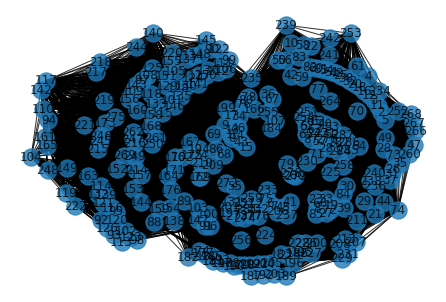

In [7]:
G=nx.from_numpy_matrix(matrix)
nx.draw_kamada_kawai(G, with_labels=True,  alpha = 0.8)

In [8]:
adjacency = matrix.copy()
adjacency[adjacency <=10] = 0
adjacency[adjacency > 10] = 1

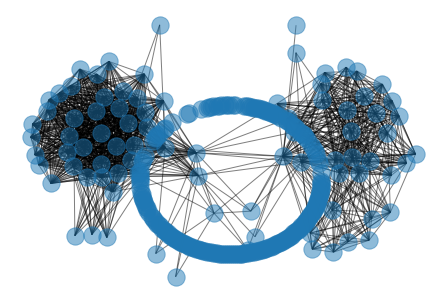

In [9]:
G2=nx.from_numpy_matrix(adjacency)
nx.draw_kamada_kawai(G2, with_labels=False,  alpha = 0.5)

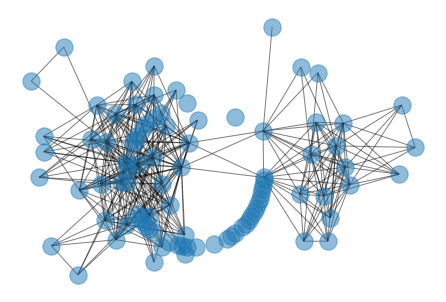

In [10]:
matrix_1980 = compute_matrix(1980, dfm)
adjacency_1980 = matrix_1980.copy()
adjacency_1980[adjacency_1980 <=2] = 0
adjacency_1980[adjacency_1980 > 2] = 1
G3=nx.from_numpy_matrix(adjacency_1980)
nx.draw_kamada_kawai(G3, with_labels=False,  alpha = 0.5)